In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Cancer PCA on Sir's given data

In [2]:
df = pd.read_csv('../cases/Cancer/Cancer.csv', index_col=0)
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
subjid,,,,,,,,,,
1,40-49,premeno,15 to 19,0 to 2,yes,three,right,left_up,no,recurrence-events
2,50-59,ge40,15 to 19,0 to 2,no,one,right,central,no,no-recurrence-events
3,50-59,ge40,35 to 39,0 to 2,no,two,left,left_low,no,recurrence-events
4,40-49,premeno,35 to 39,0 to 2,yes,three,right,left_low,yes,no-recurrence-events
5,40-49,premeno,30 to 34,3 to 5,yes,two,left,right_up,no,recurrence-events


In [3]:
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [4]:
df = pd.get_dummies(df, drop_first=True, dtype='int64', 
               columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
                        'deg-malig', 'breast', 'breast-quad', 'irradiat'])

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
pca = PCA()
scores = pca.fit_transform(X)

In [8]:
pca.explained_variance_ratio_

array([0.13005885, 0.10980951, 0.09852125, 0.07572582, 0.06752445,
       0.05653109, 0.05471408, 0.05130128, 0.04659761, 0.04120573,
       0.03542505, 0.03107764, 0.02818736, 0.02519371, 0.02284187,
       0.02104305, 0.01806963, 0.01666164, 0.01373219, 0.01049741,
       0.00775196, 0.0072842 , 0.00618683, 0.00532079, 0.00459663,
       0.00406895, 0.00365098, 0.00270604, 0.00215275, 0.00082512,
       0.00056932, 0.00016722])

<BarContainer object of 32 artists>

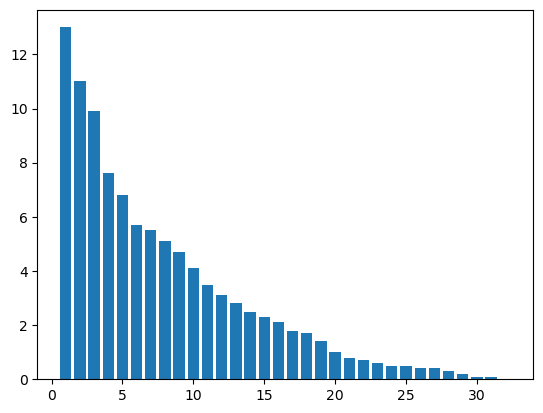

In [9]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
plt.bar(x=np.arange(1, len(per_var)+1), height=per_var)

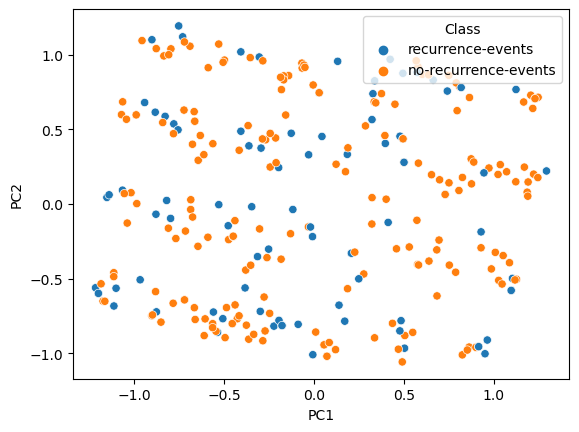

In [10]:
PCs = pd.DataFrame({'PC1':scores[:,0],
                    'PC2':scores[:,1],
                    'Class':y})
sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
plt.show()

### Cancer on sklearn data

In [19]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [21]:
# Apply Standard Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X.shape

(569, 30)

In [30]:
pca = PCA()
scores = pca.fit_transform(X)

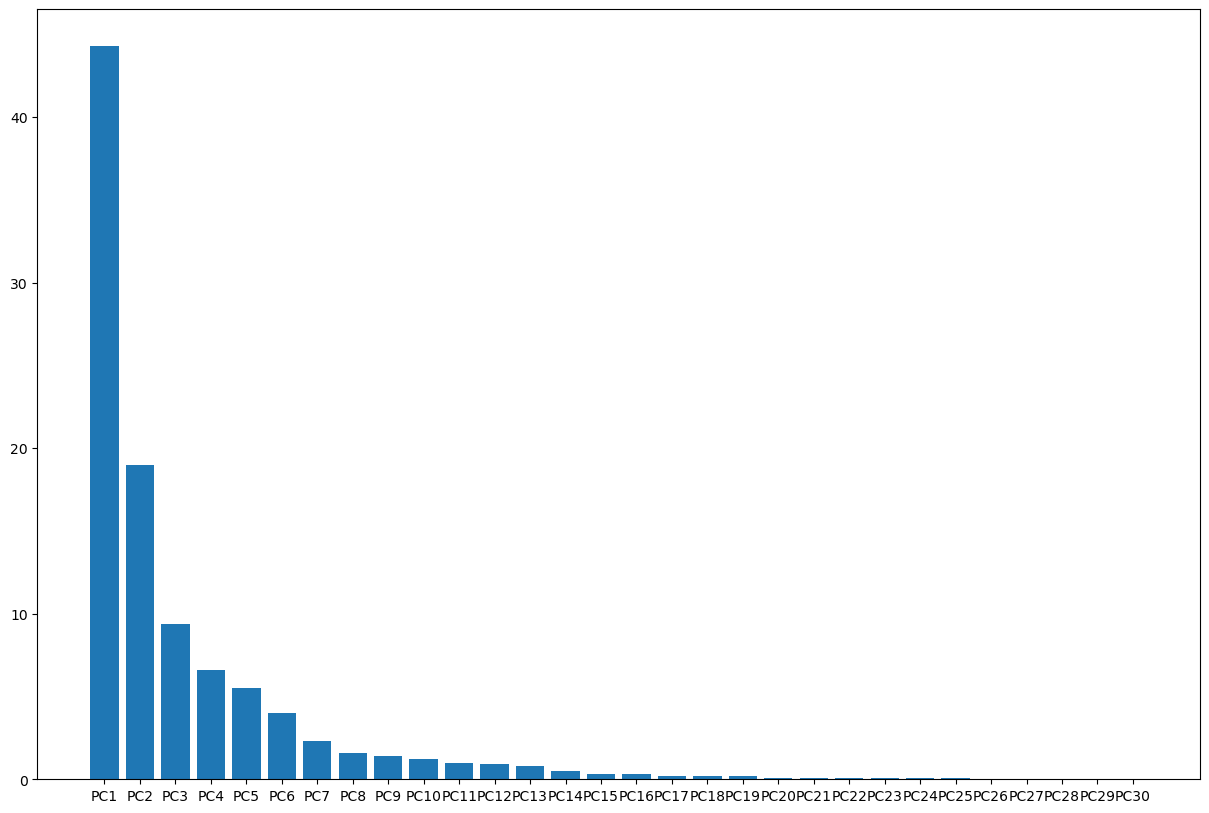

In [37]:
per_var = np.round(pca.explained_variance_ratio_*100, 1)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

plt.figure(figsize=(15, 10))
plt.bar(labels, per_var)
plt.show()

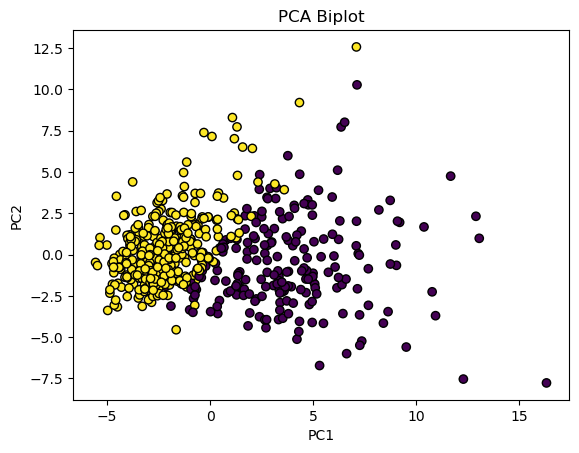

In [39]:
# Plot the scores (data points)
plt.scatter(scores[:, 0], scores[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.show()